In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
X_train = pd.read_csv("/content/drive/MyDrive/MLCW/X_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/MLCW/X_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/MLCW/y_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/MLCW/y_test.csv")

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32939, 41)
X_test shape: (8235, 41)
y_train shape: (32939, 1)
y_test shape: (8235, 1)


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
X_test_scaled = scaler.transform(X_test)

In [9]:
print("\nSample of Scaled Training Data:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


Sample of Scaled Training Data:
        age  education  campaign     pdays  previous  emp.var.rate  \
0 -0.195569  -0.161581 -0.206938  0.195449 -0.350058      0.648892   
1  1.525395  -0.161581 -0.206938  0.195449 -0.350058     -1.196645   
2 -0.482397   1.013195 -0.206938  0.195449 -0.350058     -0.114778   
3 -0.386788   1.600583 -0.563944  0.195449 -0.350058     -0.114778   
4 -0.864833   1.013195  0.150068  0.195449 -0.350058      0.839810   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_may  \
0        0.721856       0.887857   0.712479     0.332731  ...   1.410326   
1       -0.864310      -1.423113  -1.272167    -0.936590  ...  -0.709056   
2       -0.648564      -0.321623   0.289049     0.399029  ...  -0.709056   
3       -0.648564      -0.321623   0.232016     0.399029  ...  -0.709056   
4        1.534788      -0.278427   0.772392     0.845156  ...  -0.709056   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0  -0.331537  -0.

In [10]:
X_train.head()

,age,education,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.259259,4,0.018182,1.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735,...,True,False,False,False,False,True,False,False,True,False
1,0.481481,4,0.018182,1.0,0.0,0.333333,0.340608,0.154812,0.175924,0.512287,...,False,False,False,False,False,True,False,False,True,False
2,0.222222,6,0.018182,1.0,0.0,0.687500,0.389322,0.368201,0.790297,0.877883,...,False,True,False,False,False,False,False,True,True,False
3,0.234568,7,0.000000,1.0,0.0,0.687500,0.389322,0.368201,0.767853,0.877883,...,False,True,False,False,False,False,False,False,True,False
4,0.172840,6,0.036364,1.0,0.0,1.000000,0.882307,0.376569,0.980503,1.000000,...,False,False,False,False,False,False,False,False,True,False


In [11]:
# Verify scaling
print("Before Scaling:")
print(X_train.head())  # Original data
print("\nAfter Scaling:")
print(X_train_scaled[:5])  # Scaled data

Before Scaling:
        age  education  campaign  pdays  previous  emp.var.rate  \
0  0.259259          4  0.018182    1.0       0.0      0.937500   
1  0.481481          4  0.018182    1.0       0.0      0.333333   
2  0.222222          6  0.018182    1.0       0.0      0.687500   
3  0.234568          7  0.000000    1.0       0.0      0.687500   
4  0.172840          6  0.036364    1.0       0.0      1.000000   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_may  \
0        0.698753       0.602510   0.956926     0.859735  ...       True   
1        0.340608       0.154812   0.175924     0.512287  ...      False   
2        0.389322       0.368201   0.790297     0.877883  ...      False   
3        0.389322       0.368201   0.767853     0.877883  ...      False   
4        0.882307       0.376569   0.980503     1.000000  ...      False   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0      False      False      False            False 

In [12]:
# Ensure y_train and y_test are properly encoded
y_train = y_train.map({'yes': 1, 'no': 0}) if isinstance(y_train, pd.Series) else y_train
y_test = y_test.map({'yes': 1, 'no': 0}) if isinstance(y_test, pd.Series) else y_test

# Convert to NumPy arrays if necessary
y_train = y_train.values if hasattr(y_train, 'values') else y_train
y_test = y_test.values if hasattr(y_test, 'values') else y_test

# Verify encoding
print("Encoded y_train values:", y_train[:5])
print("Encoded y_test values:", y_test[:5])


Encoded y_train values: [[0]
 [0]
 [1]
 [0]
 [0]]
Encoded y_test values: [[0]
 [0]
 [0]
 [0]
 [0]]


# FCNN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()

In [15]:
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Balance the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after balancing
print("Class distribution after SMOTE:", Counter(y_train_balanced))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE: Counter({0: 29228, 1: 29228})


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Initialize the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, input_dim=X_train_balanced.shape[1], activation='relu'))
model.add(BatchNormalization())  # Batch normalization
model.add(Dropout(0.3))          # Dropout with 30% probability

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,513 (64.50 KB)

 Trainable params: 16,129 (63.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [48]:
# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping

# Initialize early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8035 - loss: 0.4289 - val_accuracy: 0.8300 - val_loss: 0.4287
Epoch 2/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7993 - loss: 0.4295 - val_accuracy: 0.8474 - val_loss: 0.4171
Epoch 3/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8025 - loss: 0.4272 - val_accuracy: 0.8391 - val_loss: 0.4177
Epoch 4/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8078 - loss: 0.4164 - val_accuracy: 0.8289 - val_loss: 0.4346
Epoch 5/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8065 - loss: 0.4190 - val_accuracy: 0.8383 - val_loss: 0.4070
Epoch 6/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8095 - loss: 0.4109 - val_accuracy: 0.8281 - val_loss: 0.4293
Epoch 7/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8110 - loss: 0.4093 - val_accuracy: 0.8277 - val_loss: 0.4369
Epoch 8/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8139 - loss: 0.4044 -

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      7307
           1       0.38      0.57      0.45       928

    accuracy                           0.85      8235
   macro avg       0.66      0.72      0.68      8235
weighted avg       0.88      0.85      0.86      8235



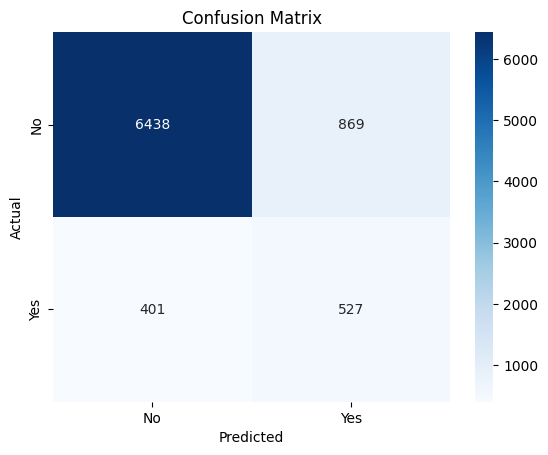

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ANN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

In [20]:
# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

In [21]:
model.add(Dense(32, activation='relu'))

In [22]:
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [47]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50, batch_size=32, verbose=1
)


Epoch 1/50


ValueError: Cannot take the length of shape with unknown rank.

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.88


In [29]:
# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [30]:
# Classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7307
           1       0.47      0.34      0.40       928

    accuracy                           0.88      8235
   macro avg       0.69      0.65      0.67      8235
weighted avg       0.87      0.88      0.87      8235



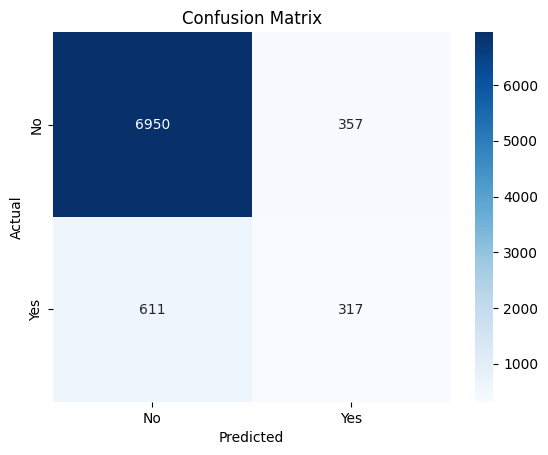

In [31]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

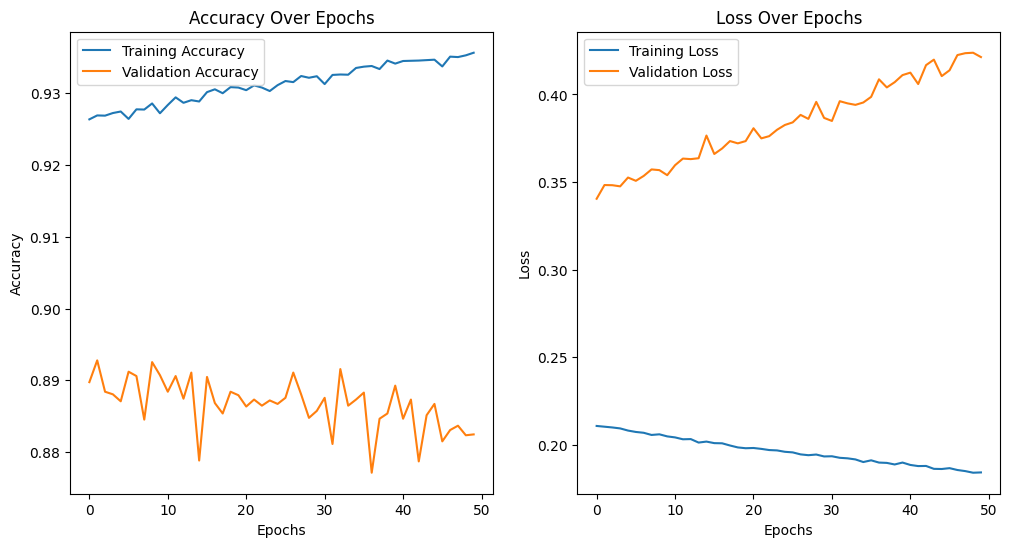

In [37]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
